##Random Forest with 


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

#behav = pd.read_csv('C:/Users/Wonn/Documents/GitHub/ML-For-Beginners/Photometry/data/300behavior.csv')
behav = pd.read_csv('C:/Users/wonnp/Documents/GitHub/ML-For-Beginners/Photometry/data/300behavior.csv')

removeOmits = behav[behav['NextLever'] != 0]



In [14]:
removeOmits['NextLever'] = removeOmits['NextLever'].replace(1, 0)
removeOmits['NextLever'] = removeOmits['NextLever'].replace(3, 1)
removeOmits['NextLever'] = removeOmits['NextLever'].replace(2, 1)

ex29 = removeOmits[removeOmits['ID'] != 29]

df = ex29[(ex29['Trial#'] > 20) & ~(ex29['Trial#'].isin([40, 60]))]

df.head



C:\Users\wonnp\AppData\Local\Temp\ipykernel_16248\2085709505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removeOmits['NextLever'] = removeOmits['NextLever'].replace(1, 0)
C:\Users\wonnp\AppData\Local\Temp\ipykernel_16248\2085709505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removeOmits['NextLever'] = removeOmits['NextLever'].replace(3, 1)
C:\Users\wonnp\AppData\Local\Temp\ipykernel_16248\2085709505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

<bound method NDFrame.head of       ID    Date  Trial#  Lever  NextLever  WSLS  LeverZmax  LeverZmin  \
20    16  230123      21      3          1     1   2.401602  -1.003824   
21    16  230123      22      3          1     1   2.926855  -1.217437   
22    16  230123      23      3          1     1   1.696856  -1.406294   
23    16  230123      24      3          1     1   1.724995  -1.203465   
24    16  230123      25      3          1     1   0.747431  -1.450247   
...   ..     ...     ...    ...        ...   ...        ...        ...   
1668  32  230407      46      2          1     4   2.178934  -2.011815   
1669  32  230407      47      2          0     2   1.441027  -1.541796   
1671  32  230407      50      1          1     0   0.368848  -0.990443   
1672  32  230407      51      3          0     3   3.332265  -1.602789   
1674  32  230407      55      1          1     0   0.637471  -3.201188   

        LeverAUC    HLZmax    HLZmin       HLAUC  
20     80.581480  2.714354 -3.

In [15]:
from sklearn.utils import resample

# Assuming 'df' is your DataFrame and 'NextLever' is the target column
# First, split the data into two separate DataFrames based on the class
df_class_0 = df[df['NextLever'] == 0]
df_class_1 = df[df['NextLever'] == 1]

# Find the number of samples in the smaller class
n_samples = min(len(df_class_0), len(df_class_1))

# Downsample the larger class to the size of the smaller class
df_class_0_downsampled = resample(df_class_0, replace=False, n_samples=n_samples, random_state=42)
df_class_1_downsampled = resample(df_class_1, replace=False, n_samples=n_samples, random_state=42)

# Combine the downsampled classes back into a single DataFrame
df_balanced = pd.concat([df_class_0_downsampled, df_class_1_downsampled])

# Now df_balanced has an equal number of samples from both classes
print(df_balanced['NextLever'].value_counts())  # Should print the same number for both classes



NextLever
0    109
1    109
Name: count, dtype: int64


In [16]:

feature_names = ['LeverZmax','LeverZmin','LeverAUC','HLZmax','HLZmin','HLAUC','NextLever'] 
df_filtered = df_balanced[feature_names]


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Example dataset
# Replace this with your actual dataset

# Assuming df is your DataFrame and 'NextLever' is the target variable
X = df_filtered.drop('NextLever', axis=1)  # Predictor variables
y = df_filtered['NextLever']  # Target variable with three categories

# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:

X_train_res =X_train
y_train_res =y_train

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Creating the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Training the classifier using the resampled training data
rf.fit(X_train_res, y_train_res)

# Making predictions on the test data
y_pred = rf.predict(X_test)
y_scores = rf.predict_proba(X_test)[:, 1]

# Evaluating the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.62      0.63        32
           1       0.66      0.68      0.67        34

    accuracy                           0.65        66
   macro avg       0.65      0.65      0.65        66
weighted avg       0.65      0.65      0.65        66

Confusion Matrix:
[[20 12]
 [11 23]]


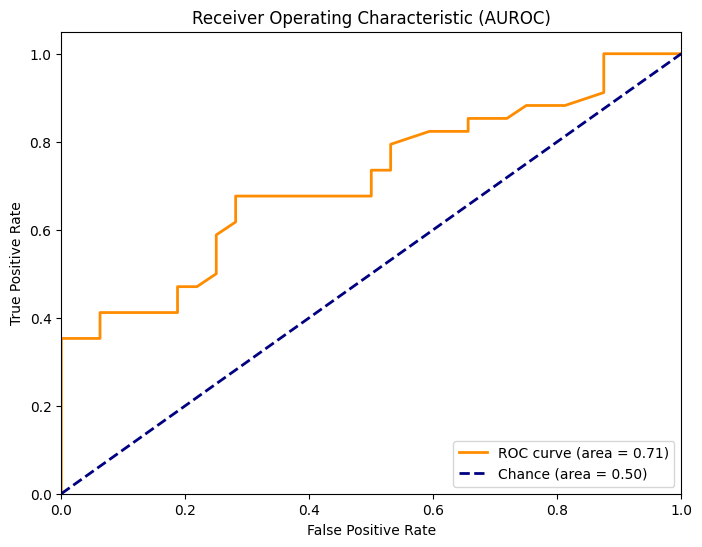

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance (area = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AUROC)')
plt.legend(loc="lower right")
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming rf_model is your trained Random Forest model
feature_importances = rf.feature_importances_

# Getting feature names (make sure this matches the order of features used in the model)
feature_names = X_train_res.columns  # Adjust X_train to your training dataset

# Create a pandas Series to view the feature importances
importances = pd.Series(feature_importances, index=feature_names)


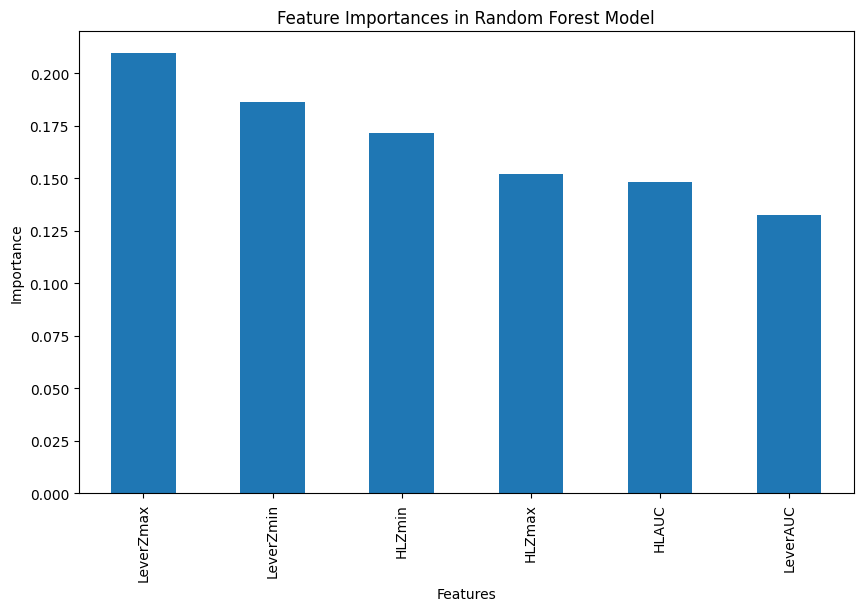

In [22]:
# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


<Figure size 300x300 with 0 Axes>

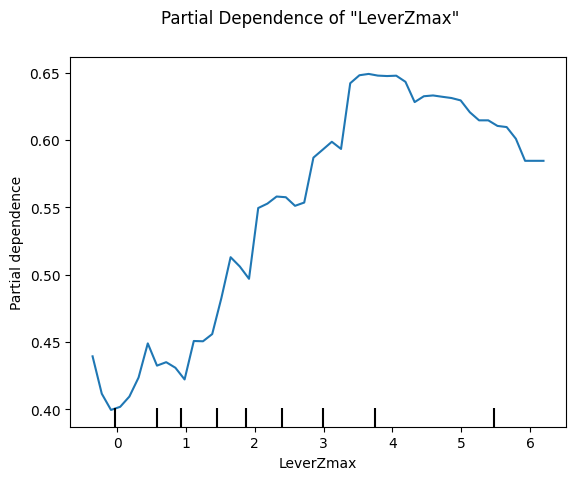

<Figure size 300x300 with 0 Axes>

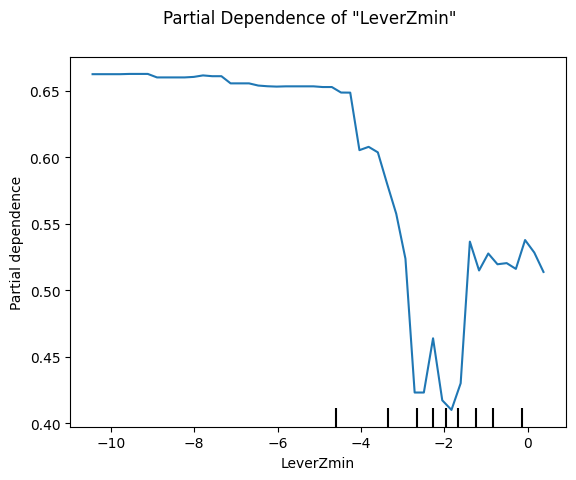

<Figure size 300x300 with 0 Axes>

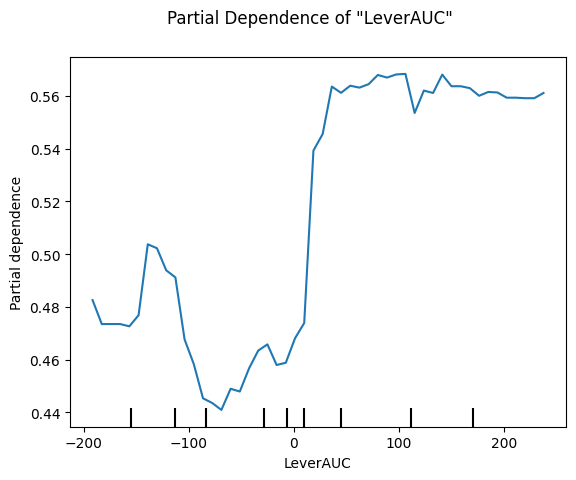

<Figure size 300x300 with 0 Axes>

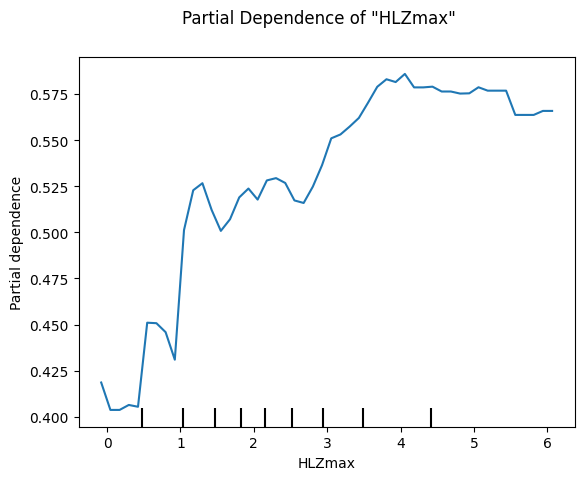

<Figure size 300x300 with 0 Axes>

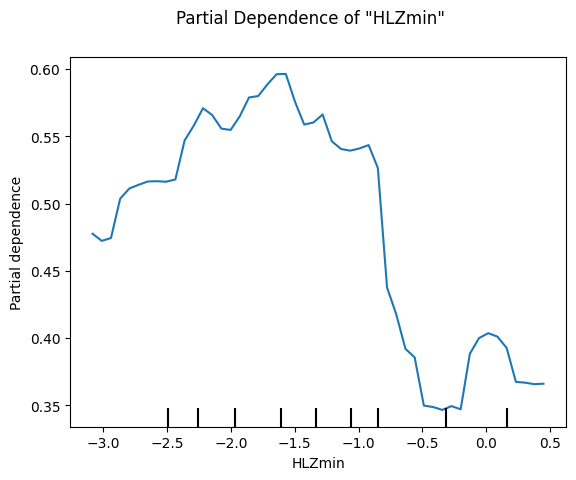

<Figure size 300x300 with 0 Axes>

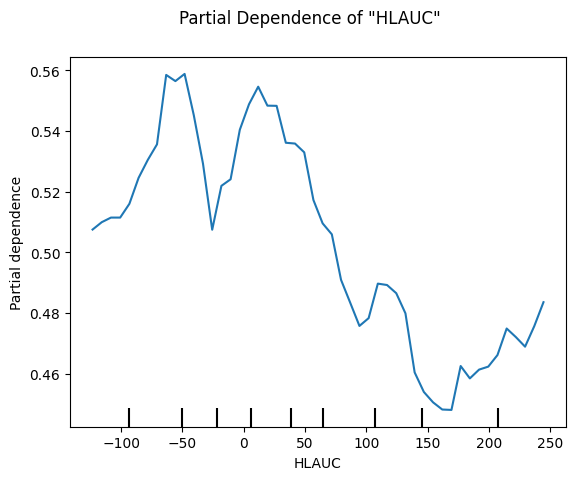

In [23]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Assuming 'rf' is your trained Random Forest model,
# 'X_train_res' is your resampled training data,
# and 'feature_names' is a list of feature names

for feature_name in feature_names:
    # Create a figure for each feature
    plt.figure(figsize=(3, 3))
    
    # Compute the partial dependence for the current feature
    display = PartialDependenceDisplay.from_estimator(
        rf, 
        X_train_res, 
        features=[feature_name],  # Specify the current feature
        feature_names=feature_names,
        grid_resolution=50  # Increase or decrease based on desired resolution
    )
    
    # Customize the plot here if needed
    display.figure_.suptitle('Partial Dependence of "{}"'.format(feature_name))
    display.figure_.subplots_adjust(wspace=0.3, hspace=0.3)
    
    # Show the plot
    plt.show()


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import partial_dependence
from sklearn.model_selection import train_test_split

# Assuming X_train_res is your resampled training data and rf is your trained Random Forest model
# Choose the feature for which you want to plot the partial dependence plot
feature_index = 2  # Index of the feature in X_train_res
feature_name = feature_names[feature_index]  # Replace with the actual feature name if available

# Calculate partial dependence
pd_results = partial_dependence(rf, X_train_res, features=[feature_index], grid_resolution=100)
average_pred = pd_results.average[0]
values = pd_results['values'][0]

# Bootstrap to get confidence intervals
n_bootstraps = 100
bootstrap_pred = np.zeros((n_bootstraps, len(values)))

for n in range(n_bootstraps):
    bootstrap_idx = np.random.choice(range(X_train_res.shape[0]), size=X_train_res.shape[0], replace=True)
    X_bootstrap = X_train_res.iloc[bootstrap_idx, :]
    pd_bootstrap = partial_dependence(rf, X_bootstrap, features=[feature_index], grid_resolution=100)
    bootstrap_pred[n, :] = pd_bootstrap.average[0]

# Calculating percentiles for confidence intervals
lower = np.percentile(bootstrap_pred, 2.5, axis=0)
upper = np.percentile(bootstrap_pred, 97.5, axis=0)

# Plotting the partial dependence plot with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(values, average_pred, label='Partial Dependence')

# Plotting the confidence intervals
plt.fill_between(values, lower, upper, color='b', alpha=.1, label='95% CI')

plt.xlabel(feature_name)
plt.ylabel('Partial Dependence')
plt.title(f'Partial Dependence Plot with 95% CI for {feature_name}')
plt.legend()
plt.show()


c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


ValueError: could not broadcast input array from shape (97,) into shape (100,)

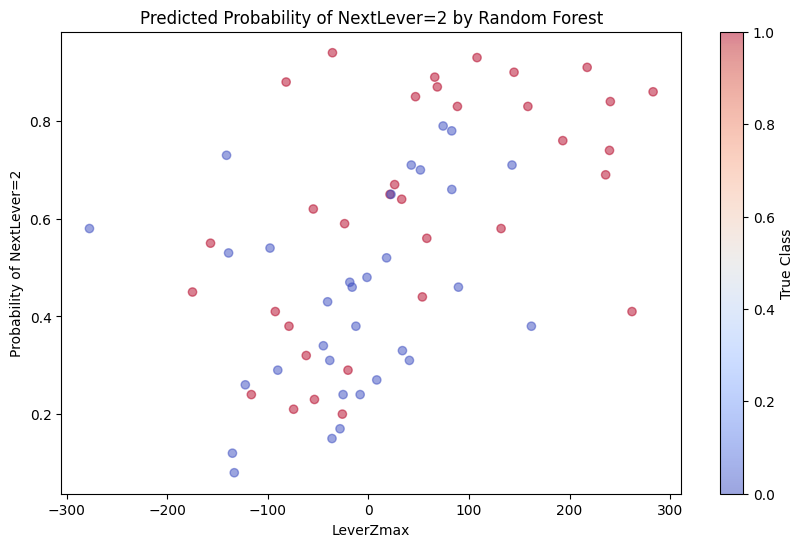

In [25]:
y_prob = rf.predict_proba(X_test)  # rf is your trained Random Forest model
prob_next_lever_2 = y_prob[:, 1]

import matplotlib.pyplot as plt

# This assumes X_test has a meaningful index or a specific column to use for the x-axis
# Replace 'X_axis_column' with the column name or index to plot on the x-axis
x_axis = X_test['LeverAUC']  

plt.figure(figsize=(10, 6))
plt.scatter(x_axis, prob_next_lever_2, c=y_test, alpha=0.5, cmap='coolwarm')
plt.colorbar(label='True Class')
plt.xlabel('LeverZmax')
plt.ylabel('Probability of NextLever=2')
plt.title('Predicted Probability of NextLever=2 by Random Forest')
#plt.xlim(-3, 10)
#plt.ylim(0, 1)
plt.show()


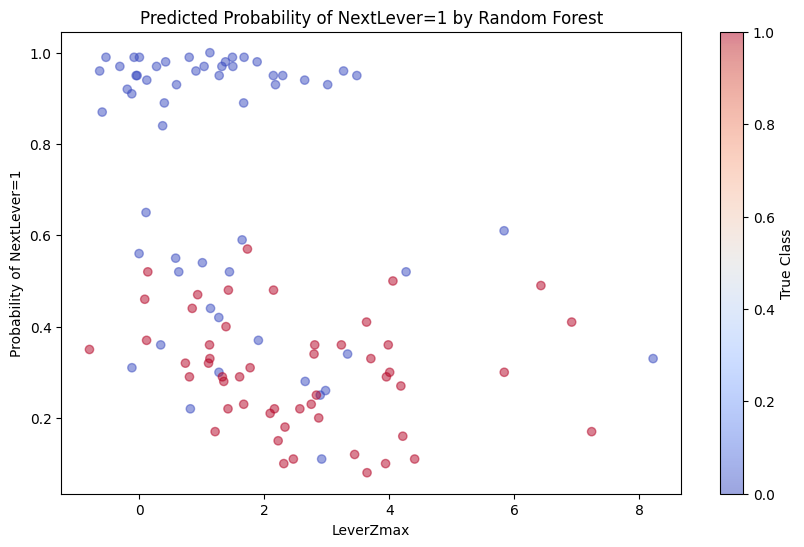

In [14]:
y_prob = rf.predict_proba(X_test)  # rf is your trained Random Forest model
prob_next_lever_2 = y_prob[:, 0]

import matplotlib.pyplot as plt

# This assumes X_test has a meaningful index or a specific column to use for the x-axis
# Replace 'X_axis_column' with the column name or index to plot on the x-axis
x_axis = X_test['LeverZmax']  

plt.figure(figsize=(10, 6))
plt.scatter(x_axis, prob_next_lever_2, c=y_test, alpha=0.5, cmap='coolwarm')
plt.colorbar(label='True Class')
plt.xlabel('LeverZmax')
plt.ylabel('Probability of NextLever=1')
plt.title('Predicted Probability of NextLever=1 by Random Forest')
plt.show()

In [49]:
smalls = df[(df['NextLever']==0)]
smalls.head


<bound method NDFrame.head of       ID    Date  Trial#  Lever  NextLever  WSLS  LeverZmax  LeverZmin  \
26    16  230109      27      3          0     3   0.146371  -0.805181   
53    16  230109      55      2          0     2   0.697589  -1.147658   
160   16  230111      42      2          0     2   0.836835  -2.292643   
222   16  230112      44      2          0     2   1.691428  -0.084556   
377   18  230110      25      3          0     3   8.223724  -0.134008   
...   ..     ...     ...    ...        ...   ...        ...        ...   
4956  32  230407      28      3          0     3   2.272898  -1.849932   
4963  32  230407      35      3          0     3   1.879632  -1.603914   
4966  32  230407      38      3          0     3   6.064540   0.639414   
4975  32  230407      47      2          0     2   1.441027  -1.541796   
4978  32  230407      51      3          0     3   3.332265  -1.602789   

        LeverAUC     HLZmax    HLZmin       HLAUC  Shock  
26    -31.451946   0.7

In [50]:
large = df[(df['NextLever']==1)]
large.head

<bound method NDFrame.head of       ID    Date  Trial#  Lever  NextLever  WSLS  LeverZmax  LeverZmin  \
20    16  230109      21      3          1     1   1.327565  -2.075430   
21    16  230109      22      2          1     4   1.013489  -0.201105   
22    16  230109      23      3          1     1   1.279473   0.466496   
23    16  230109      24      3          1     1   0.922766  -2.325989   
24    16  230109      25      3          1     1   0.928536  -2.505650   
...   ..     ...     ...    ...        ...   ...        ...        ...   
4972  32  230407      44      2          1     4   1.861455  -0.784384   
4973  32  230407      45      3          1     1   4.945879  -0.068355   
4974  32  230407      46      2          1     4   2.178934  -2.011815   
4977  32  230407      50      1          1     0   0.368848  -0.990443   
4980  32  230407      55      1          1     0   0.637471  -3.201188   

        LeverAUC    HLZmax    HLZmin       HLAUC  Shock  
20    -74.113150  3.140